No handles with labels found to put in legend.


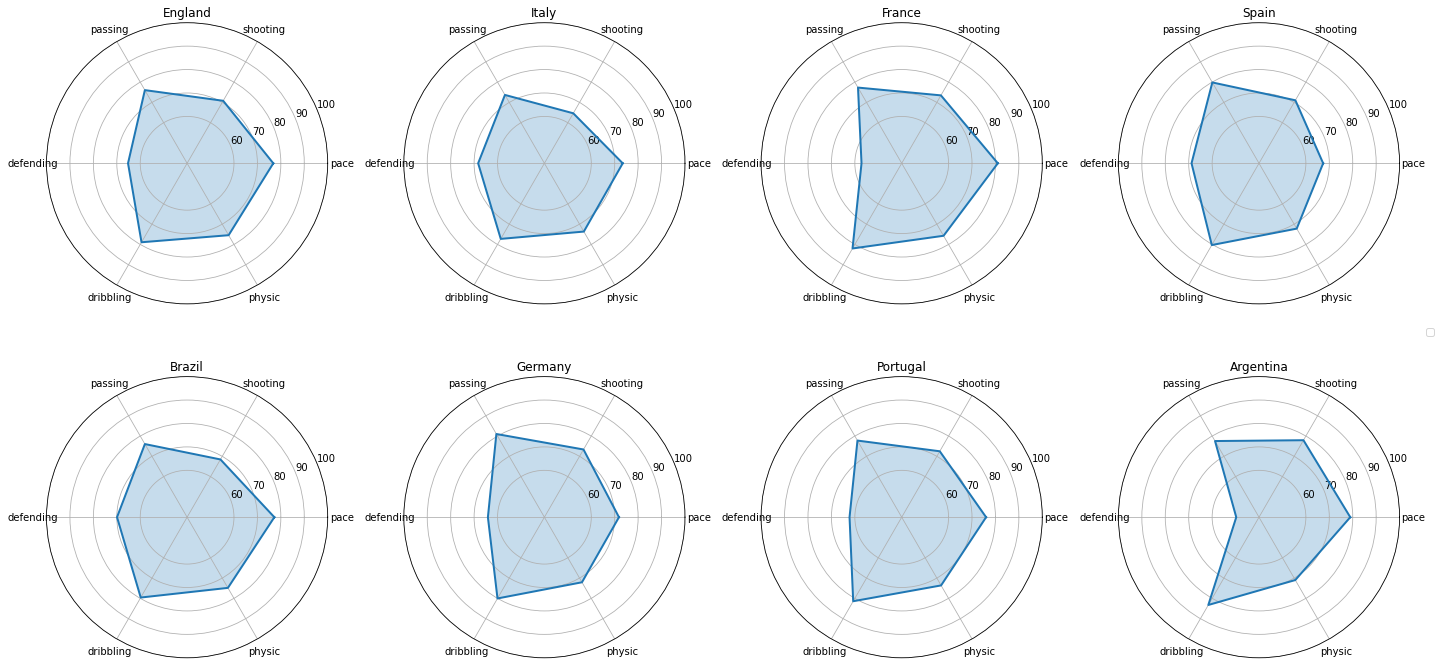

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 加载数据
df = pd.read_csv('./Info_Visualize/archive/male_players.csv')

countries = ['England', 'Italy', 'France', 'Spain', 'Brazil', 'Germany', 'Portugal', 'Argentina']
attributes = ['pace', 'shooting', 'passing', 'defending', 'dribbling', 'physic']
num_vars = len(attributes)
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]

fig, axes = plt.subplots(2, 4, figsize=(20, 10), subplot_kw=dict(polar=True))

for country, ax in zip(countries, axes.flat):
    players = df[df['nationality_name'] == country].sort_values(by='overall', ascending=False).head(100)
    values = players[attributes].mean().values
    values = np.concatenate((values, [values[0]]))

    ax.plot(angles, values, linewidth=2)
    ax.fill(angles, values, alpha=0.25)
    ax.set_title(country, position=(0.5, 1.1))
    
    ax.set_ylim(40, 100)  # 设置雷达图的中心为60，最外侧为100
    ax.set_yticks(np.arange(60, 101, 10))
    ax.set_yticklabels(np.arange(60, 101, 10))
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(attributes)

# 在整个图的右侧放置图例
fig.legend(loc='center right')
plt.tight_layout()
plt.show()


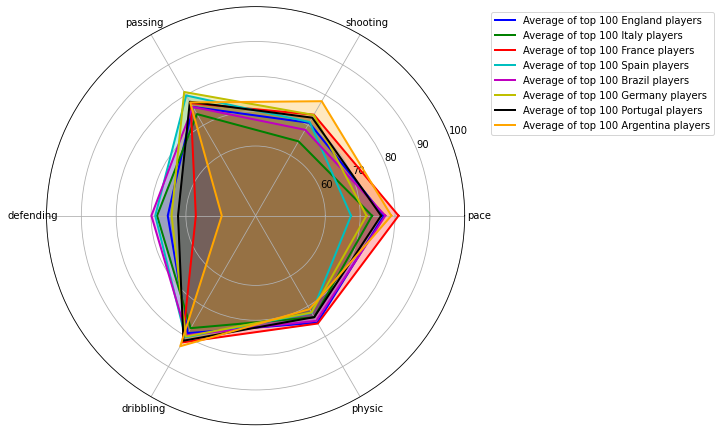

In [24]:
# 加载数据
df = pd.read_csv('./Info_Visualize/archive/male_players.csv')

countries = ['England', 'Italy', 'France', 'Spain', 'Brazil', 'Germany', 'Portugal', 'Argentina']
attributes = ['pace', 'shooting', 'passing', 'defending', 'dribbling', 'physic']
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'orange']
num_vars = len(attributes)
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]

fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(polar=True))

for country, color in zip(countries, colors):
    players = df[df['nationality_name'] == country].sort_values(by='overall', ascending=False).head(100)
    values = players[attributes].mean().values
    values = np.concatenate((values, [values[0]]))
    
    ax.plot(angles, values, linewidth=2, label=f'Average of top 100 {country} players', color=color)
    ax.fill(angles, values, alpha=0.25, color=color)

ax.set_ylim(40, 100)
ax.set_yticks(np.arange(60, 101, 10))
ax.set_yticklabels(np.arange(60, 101, 10))
ax.set_xticks(angles[:-1])
ax.set_xticklabels(attributes)

ax.legend(loc='upper left', bbox_to_anchor=(1.05, 1))
plt.tight_layout()
plt.show()


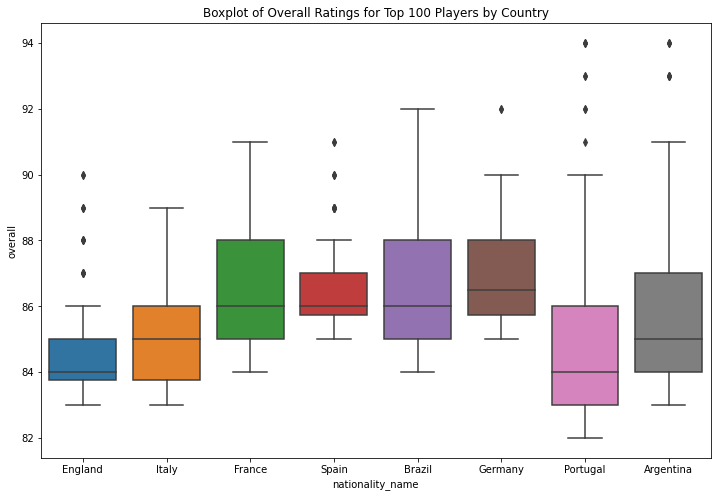

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# 假设您的DataFrame是df
countries = ['England', 'Italy', 'France', 'Spain', 'Brazil', 'Germany', 'Portugal', 'Argentina']

# 为每个国家选择前100名球员的数据
top100_dfs = []
for country in countries:
    top_players = df[df['nationality_name'] == country].nlargest(100, 'overall')
    top100_dfs.append(top_players)

# 将这些数据组合成一个新的DataFrame
top100_df = pd.concat(top100_dfs)

# 绘制箱线图
plt.figure(figsize=(12, 8))
sns.boxplot(x='nationality_name', y='overall', data=top100_df, order=countries)
plt.title('Boxplot of Overall Ratings for Top 100 Players by Country')
plt.show()


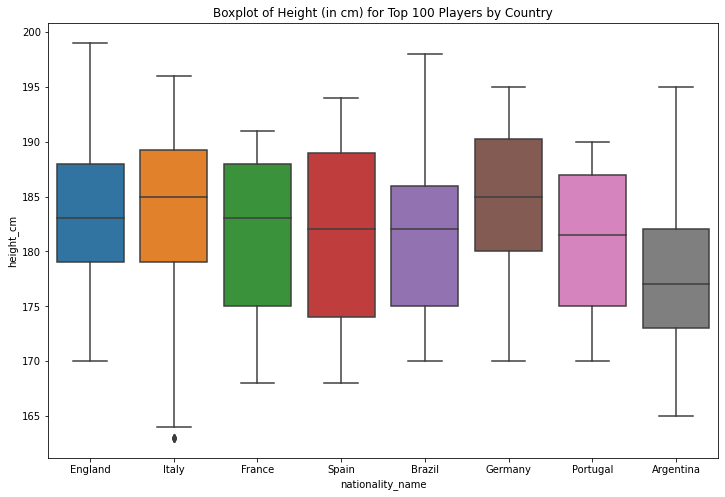

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# 假设您的DataFrame是df
countries = ['England', 'Italy', 'France', 'Spain', 'Brazil', 'Germany', 'Portugal', 'Argentina']

# 为每个国家选择前100名球员的数据
top100_dfs = []
for country in countries:
    top_players = df[df['nationality_name'] == country].nlargest(100, 'overall')
    top100_dfs.append(top_players)

# 将这些数据组合成一个新的DataFrame
top100_df = pd.concat(top100_dfs)

# 绘制箱线图
plt.figure(figsize=(12, 8))
sns.boxplot(x='nationality_name', y='height_cm', data=top100_df, order=countries)
plt.title('Boxplot of Height (in cm) for Top 100 Players by Country')
plt.show()

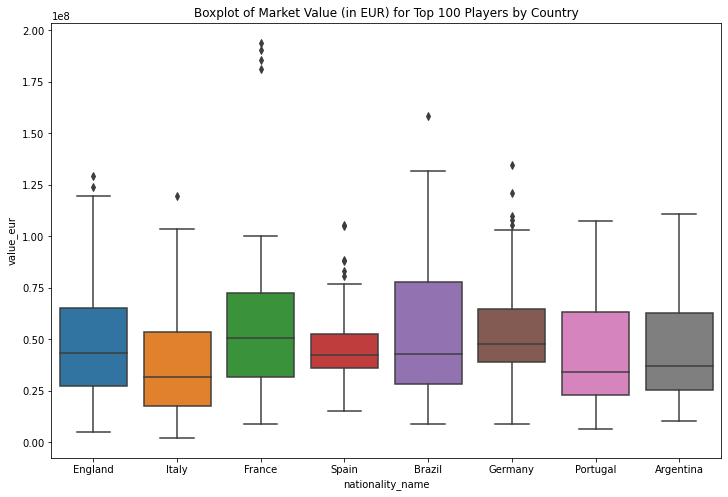

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# 假设您的DataFrame是df
countries = ['England', 'Italy', 'France', 'Spain', 'Brazil', 'Germany', 'Portugal', 'Argentina']

# 为每个国家选择前100名球员的数据
top100_dfs = []
for country in countries:
    top_players = df[df['nationality_name'] == country].nlargest(100, 'overall')
    top100_dfs.append(top_players)

# 将这些数据组合成一个新的DataFrame
top100_df = pd.concat(top100_dfs)

# 绘制箱线图
plt.figure(figsize=(12, 8))
sns.boxplot(x='nationality_name', y='value_eur', data=top100_df, order=countries)
plt.title('Boxplot of Market Value (in EUR) for Top 100 Players by Country')
plt.show()

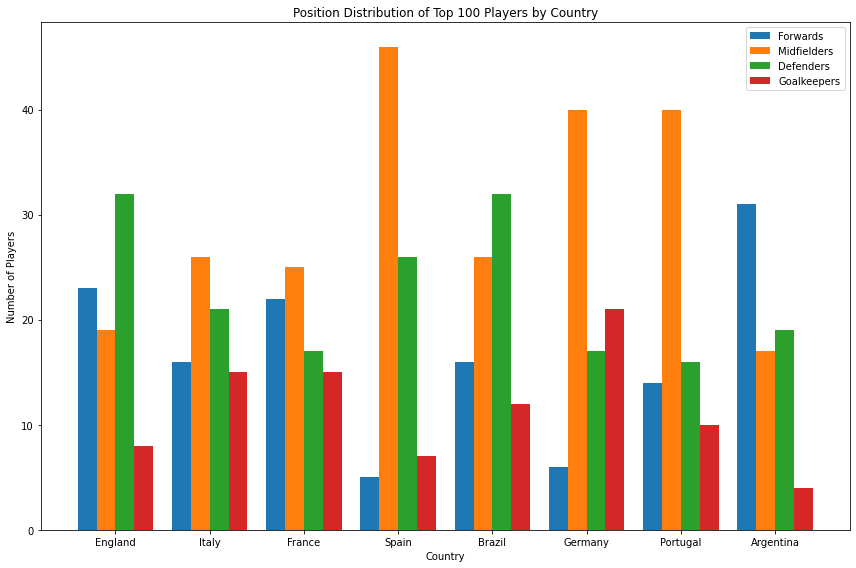

In [32]:
import pandas as pd
import matplotlib.pyplot as plt

# 假设数据已经加载到dataframe中
df = pd.read_csv('./Info_Visualize/archive/male_players.csv')

# 定义位置分类
positions = {
    'Forwards': ['ST', 'CF', 'LW', 'RW', 'LF', 'RF'],
    'Midfielders': ['CM', 'CAM', 'CDM', 'LM', 'RM', 'LAM', 'RAM', 'LCM', 'RCM', 'LDM', 'RDM'],
    'Defenders': ['CB', 'LB', 'RB', 'LWB', 'RWB', 'LCB', 'RCB'],
    'Goalkeepers': ['GK']
}

# 选择的国家列表
countries = ['England', 'Italy', 'France', 'Spain', 'Brazil', 'Germany', 'Portugal', 'Argentina']

result = {}

for country in countries:
    top_100 = df[df['nationality_name'] == country].nlargest(100, 'overall')
    counts = {key: 0 for key in positions.keys()}
    
    for _, row in top_100.iterrows():
        for key, pos_list in positions.items():
            if row['club_position'] in pos_list:
                counts[key] += 1
                break
    result[country] = counts

# 绘制直方图
fig, ax = plt.subplots(figsize=(12, 8))

width = 0.2
x = range(len(countries))

for idx, (key, pos_list) in enumerate(positions.items()):
    ax.bar(
        [i + idx * width for i in x],
        [result[country][key] for country in countries],
        width=width,
        label=key
    )

ax.set_xlabel('Country')
ax.set_ylabel('Number of Players')
ax.set_title('Position Distribution of Top 100 Players by Country')
ax.set_xticks([i + 1.5*width for i in x])
ax.set_xticklabels(countries)
ax.legend()

plt.tight_layout()
plt.show()

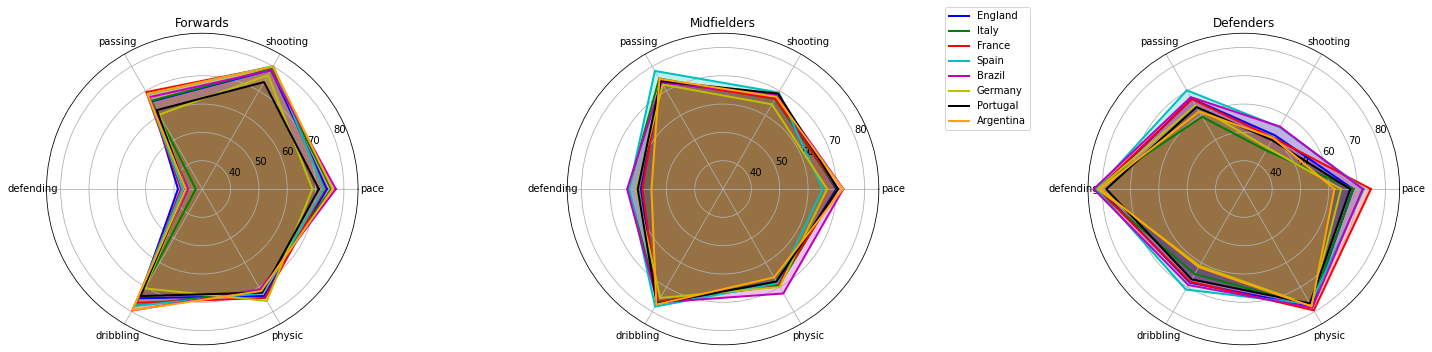

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# 假设数据已经加载到dataframe中
df = pd.read_csv('./Info_Visualize/archive/male_players.csv')

# 定义位置分类和颜色
positions = {
    'Forwards': ['ST', 'CF', 'LW', 'RW', 'LF', 'RF'],
    'Midfielders': ['CM', 'CAM', 'CDM', 'LM', 'RM', 'LAM', 'RAM', 'LCM', 'RCM', 'LDM', 'RDM'],
    'Defenders': ['CB', 'LB', 'RB', 'LWB', 'RWB', 'LCB', 'RCB']
}
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'orange']
countries = ['England', 'Italy', 'France', 'Spain', 'Brazil', 'Germany', 'Portugal', 'Argentina']
attributes = ['pace', 'shooting', 'passing', 'defending', 'dribbling', 'physic']

# 创建子图
fig, axes = plt.subplots(1, 3, figsize=(20, 7), subplot_kw=dict(polar=True))

for ax, (pos_group, pos_list) in zip(axes, positions.items()):
    for country, color in zip(countries, colors):
        # 获取国家的前100名球员
        top_100 = df[(df['nationality_name'] == country) & (df['player_positions'].isin(pos_list))].nlargest(100, 'overall')
        
        # 计算平均值
        means = top_100[attributes].mean().tolist()
        
        # 为了闭合雷达图
        means += means[:1]
        
        # 雷达图的角度设置
        angles = [n / float(len(attributes)) * 2 * np.pi for n in range(len(attributes))]
        angles += angles[:1]
        
        ax.plot(angles, means, color=color, linewidth=2, label=country)
        ax.fill(angles, means, color=color, alpha=0.25)
        ax.set_ylim(30, 85)
        ax.set_xticks(angles[:-1])
        ax.set_xticklabels(attributes)
        ax.set_title(pos_group)
        
axes[1].legend(loc='upper right', bbox_to_anchor=(1.5, 1.1))

plt.tight_layout()
plt.show()


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# 假设数据已经加载到dataframe中
df = pd.read_csv('./Info_Visualize/archive/male_players.csv')

In [2]:
print(df.columns.tolist())

['player_id', 'player_url', 'fifa_version', 'fifa_update', 'update_as_of', 'short_name', 'long_name', 'player_positions', 'overall', 'potential', 'value_eur', 'wage_eur', 'age', 'dob', 'height_cm', 'weight_kg', 'club_team_id', 'club_name', 'league_id', 'league_name', 'league_level', 'club_position', 'club_jersey_number', 'club_loaned_from', 'club_joined_date', 'club_contract_valid_until_year', 'nationality_id', 'nationality_name', 'nation_team_id', 'nation_position', 'nation_jersey_number', 'preferred_foot', 'weak_foot', 'skill_moves', 'international_reputation', 'work_rate', 'body_type', 'real_face', 'release_clause_eur', 'player_tags', 'player_traits', 'pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic', 'attacking_crossing', 'attacking_finishing', 'attacking_heading_accuracy', 'attacking_short_passing', 'attacking_volleys', 'skill_dribbling', 'skill_curve', 'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control', 'movement_acceleration', 'movement_sprint_speed'

In [3]:
df

player_id                                         player_url  \
0               2  https://sofifa.com/player/2/giovanni-pasquale/...   
1              11  https://sofifa.com/player/11/romain-rocchi/150002   
2              27       https://sofifa.com/player/27/joe-cole/150002   
3              28  https://sofifa.com/player/28/manuel-herrera-ya...   
4              41  https://sofifa.com/player/41/andres-iniesta-lu...   
...           ...                                                ...   
180016     278132               /player/278132/rakan-al-kaabi/240002   
180017     278138                   /player/278138/josh-keyes/240002   
180018     278139               /player/278139/rodrigo-frutos/240002   
180019     278141                /player/278141/christian-bos/240002   
180020     278145     /player/278145/shahruddin-magomedaliyev/240002   

        fifa_version  fifa_update update_as_of        short_name  \
0               15.0          2.0   2014-09-18       G. Pasquale   
1               15.0          2.0   2014-09-18         R. Rocchi   
2               15.0          2.0   2014-09-18           J. Cole   
3               15.0          2.0   2014-09-18      Manu Herrera   
4               15.0          2.0   2014-09-18           Iniesta   
...              ...          ...          ...               ...   
180016          24.0          2.0   2023-09-22       R. Al Kaabi   
180017          24.0          2.0   2023-09-22          J. Keyes   
180018          24.0          2.0   2023-09-22         R. Frutos   
180019          24.0          2.0   2023-09-22            C. Bos   
180020          24.0          2.0   2023-09-22  S. Magomedaliyev   

                       long_name player_positions  overall  potential  ...  \
0              Giovanni Pasquale               LM       68         68  ...   
1                  Romain Rocchi          CM, CDM       68         68  ...   
2                       Joe Cole          RM, CAM       74         74  ...   
3           Manuel Herrera Yagüe               GK       76         76  ...   
4           Andrés Iniesta Luján           CM, LW       89         89  ...   
...                          ...              ...      ...        ...  ...   
180016            Rakan Al Kaabi          CDM, CM       54         66  ...   
180017                Josh Keyes               CM       51         65  ...   
180018            Rodrigo Frutos               GK       58         66  ...   
180019             Christian Bos               RB       55         70  ...   
180020  Shahruddin Magomedaliyev               GK       70         71  ...   

         ldm   cdm   rdm   rwb    lb   lcb    cb   rcb    rb    gk  
0       69-1  69-1  69-1  71-3  72-4  70-2  70-2  70-2  72-4    13  
1         65    65    65    62    60    62    62    62    60    12  
2         59    59    59    56    50    48    48    48    50    12  
3         32    32    32    31    31    34    34    34    31    76  
4       77+3  77+3  77+3  76+3  70+3  63+3  63+3  63+3  70+3  14+3  
...      ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  
180016  53+2  53+2  53+2  53+2  54+2  54+2  54+2  54+2  54+2  13+2  
180017  48+2  48+2  48+2  49+2  48+2  44+2  44+2  44+2  48+2  14+2  
180018  29+2  29+2  29+2  24+2  23+2  24+2  24+2  24+2  23+2  57+2  
180019  49+2  49+2  49+2  51+2  53+2  52+2  52+2  52+2  53+2  13+2  
180020  23+2  23+2  23+2  21+2  21+2  23+2  23+2  23+2  21+2  69+2  

[180021 rows x 109 columns]

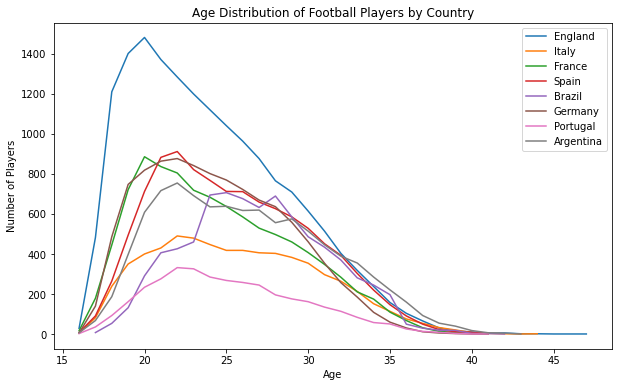

In [4]:
# 感兴趣的国家列表
countries = ['England', 'Italy', 'France', 'Spain', 'Brazil', 'Germany', 'Portugal', 'Argentina']

# 设置图表
plt.figure(figsize=(10, 6))

# 对每个国家进行循环处理
for country in countries:
    # 筛选特定国家的球员
    country_df = df[df['nationality_name'] == country]

    # 统计各年龄的球员数量
    age_count = country_df['age'].value_counts().sort_index()

    # 绘制折线图
    plt.plot(age_count, label=country)

# 添加图例
plt.legend()

# 设置标题和轴标签
plt.title('Age Distribution of Football Players by Country')
plt.xlabel('Age')
plt.ylabel('Number of Players')

# 显示图表
plt.show()

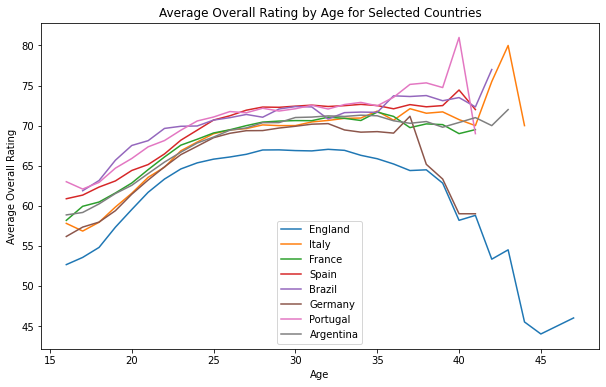

In [5]:
# 设置图表
plt.figure(figsize=(10, 6))

# 对每个国家进行循环处理
for country in countries:
    # 筛选特定国家的球员
    country_df = df[df['nationality_name'] == country]

    # 按年龄分组，并计算每个年龄组的平均整体评分
    age_overall_avg = country_df.groupby('age')['overall'].mean()

    # 绘制折线图
    plt.plot(age_overall_avg, label=country)

# 添加图例
plt.legend()

# 设置标题和轴标签
plt.title('Average Overall Rating by Age for Selected Countries')
plt.xlabel('Age')
plt.ylabel('Average Overall Rating')

# 显示图表
plt.show()

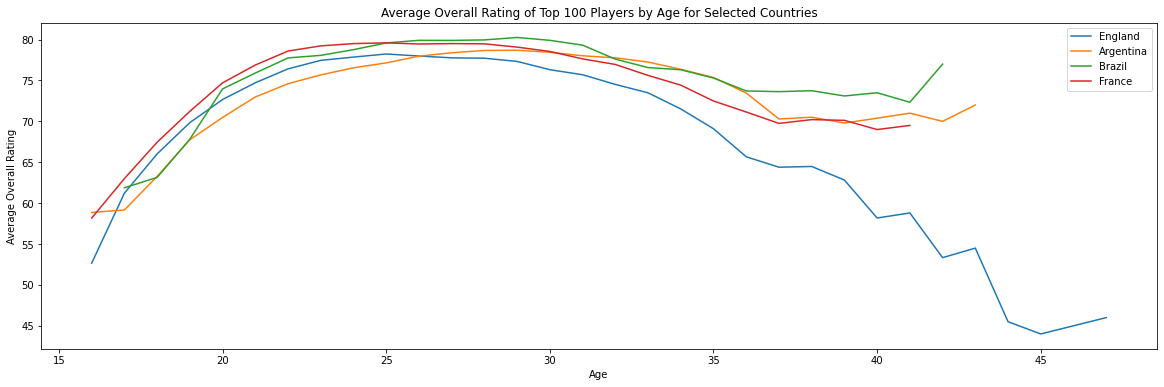

In [82]:
# 设置图表
plt.figure(figsize=(20, 6))

# 对每个国家进行循环处理
for country in countries:
    # 筛选特定国家的球员
    country_df = df[df['nationality_name'] == country]

    # 存储每个年龄段的平均整体评分
    age_overall_avg = []

    # 获取所有可能的年龄
    ages = country_df['age'].unique()

    # 对每个年龄进行循环处理
    for age in ages:
        # 筛选特定年龄的球员
        age_df = country_df[country_df['age'] == age]

        # 根据整体评分排序，并选取前100名（或所有）
        top_players = age_df.nlargest(min(100, len(age_df)), 'overall')

        # 计算平均整体评分
        average_overall = top_players['overall'].mean()

        # 添加到列表中
        age_overall_avg.append((age, average_overall))

    # 转换为DataFrame，方便绘图
    age_overall_df = pd.DataFrame(age_overall_avg, columns=['age', 'average_overall'])

    # 按年龄排序
    age_overall_df.sort_values('age', inplace=True)

    # 绘制折线图
    plt.plot(age_overall_df['age'], age_overall_df['average_overall'], label=country)

# 添加图例
plt.legend()

# 设置标题和轴标签
plt.title('Average Overall Rating of Top 100 Players by Age for Selected Countries')
plt.xlabel('Age')
plt.ylabel('Average Overall Rating')

# 显示图表
plt.show()


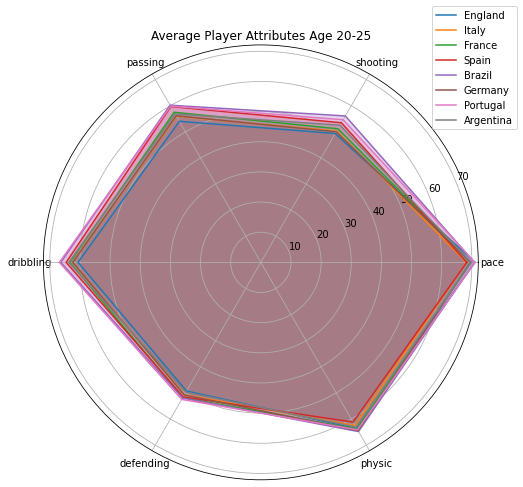

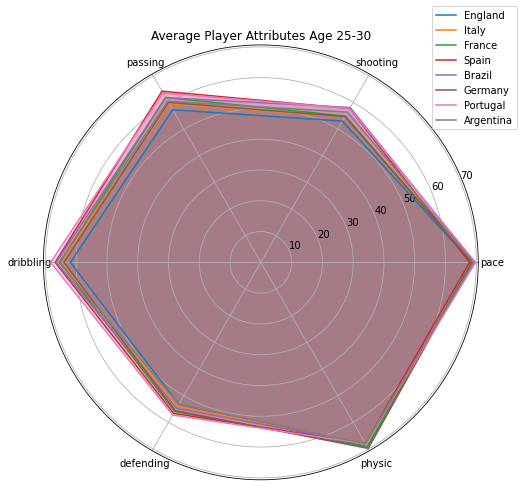

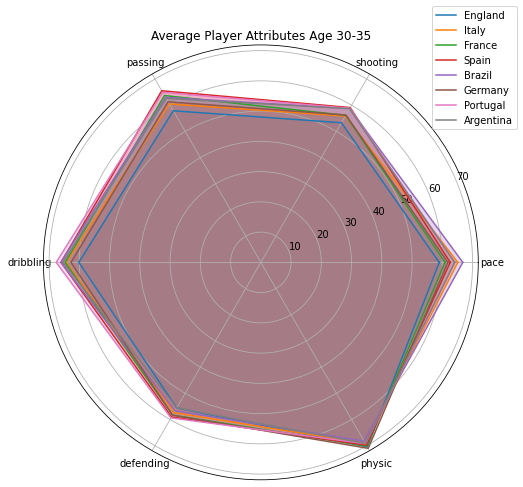

In [7]:
# 感兴趣的国家列表
countries = ['England', 'Italy', 'France', 'Spain', 'Brazil', 'Germany', 'Portugal', 'Argentina']
# 感兴趣的属性列表
attributes = ['pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic']

# 定义年龄段
age_ranges = [(20, 25), (25, 30), (30, 35)]

# 对每个年龄段绘制雷达图
for age_range in age_ranges:
    plt.figure(figsize=(8, 8))
    ax = plt.subplot(111, polar=True)
    
    # 计算每个国家在这个年龄段的平均属性值
    for country in countries:
        # 筛选特定国家和年龄段的球员
        country_df = df[(df['nationality_name'] == country) & (df['age'] >= age_range[0]) & (df['age'] <= age_range[1])]

        # 计算平均属性值
        avg_values = country_df[attributes].mean().tolist()

        # 绘制雷达图
        angles = np.linspace(0, 2 * np.pi, len(attributes), endpoint=False).tolist()
        avg_values += avg_values[:1]
        angles += angles[:1]
        
        ax.plot(angles, avg_values, label=country)
        ax.fill(angles, avg_values, alpha=0.25)

    # 设置雷达图的属性
    ax.set_thetagrids(np.degrees(angles[:-1]), attributes)
    ax.set_title(f'Average Player Attributes Age {age_range[0]}-{age_range[1]}')

    # 添加图例
    plt.legend(loc='upper right', bbox_to_anchor=(1.1, 1.1))

    # 显示图表
    plt.show()

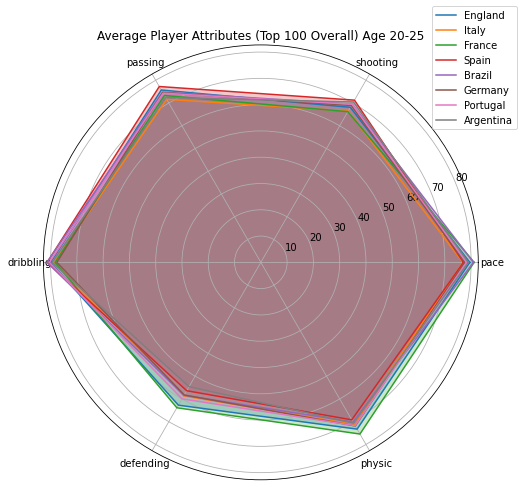

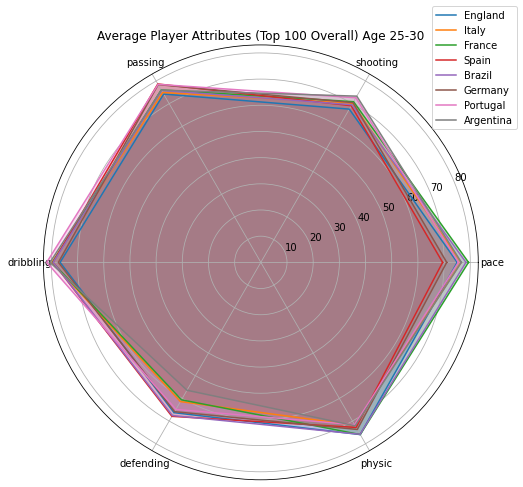

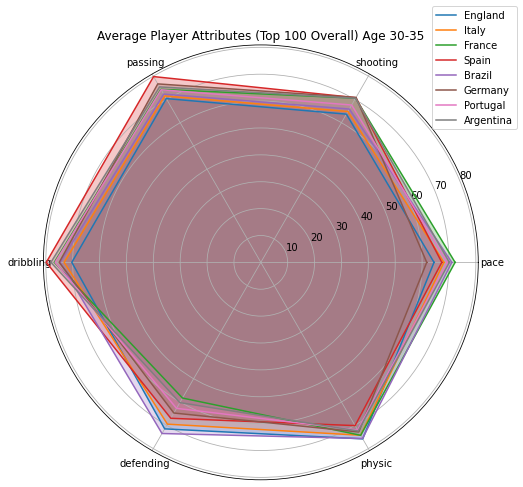

In [8]:
countries = ['England', 'Italy', 'France', 'Spain', 'Brazil', 'Germany', 'Portugal', 'Argentina']
# 感兴趣的属性列表
attributes = ['pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic']

# 定义年龄段
age_ranges = [(20, 25), (25, 30), (30, 35)]

# 对每个年龄段绘制雷达图
for age_range in age_ranges:
    plt.figure(figsize=(8, 8))
    ax = plt.subplot(111, polar=True)
    
    # 计算每个国家在这个年龄段的平均属性值
    for country in countries:
        # 筛选特定国家和年龄段的球员
        country_df = df[(df['nationality_name'] == country) & (df['age'] >= age_range[0]) & (df['age'] <= age_range[1])]

        # 选取每个年龄段每个国家overall排名前100的球员
        top_players = country_df.nlargest(100, 'overall')

        # 计算平均属性值
        avg_values = top_players[attributes].mean().tolist()

        # 绘制雷达图
        angles = np.linspace(0, 2 * np.pi, len(attributes), endpoint=False).tolist()
        avg_values += avg_values[:1]
        angles += angles[:1]
        
        ax.plot(angles, avg_values, label=country)
        ax.fill(angles, avg_values, alpha=0.25)

    # 设置雷达图的属性
    ax.set_thetagrids(np.degrees(angles[:-1]), attributes)
    ax.set_title(f'Average Player Attributes (Top 100 Overall) Age {age_range[0]}-{age_range[1]}')

    # 添加图例
    plt.legend(loc='upper right', bbox_to_anchor=(1.1, 1.1))

    # 显示图表
    plt.show()

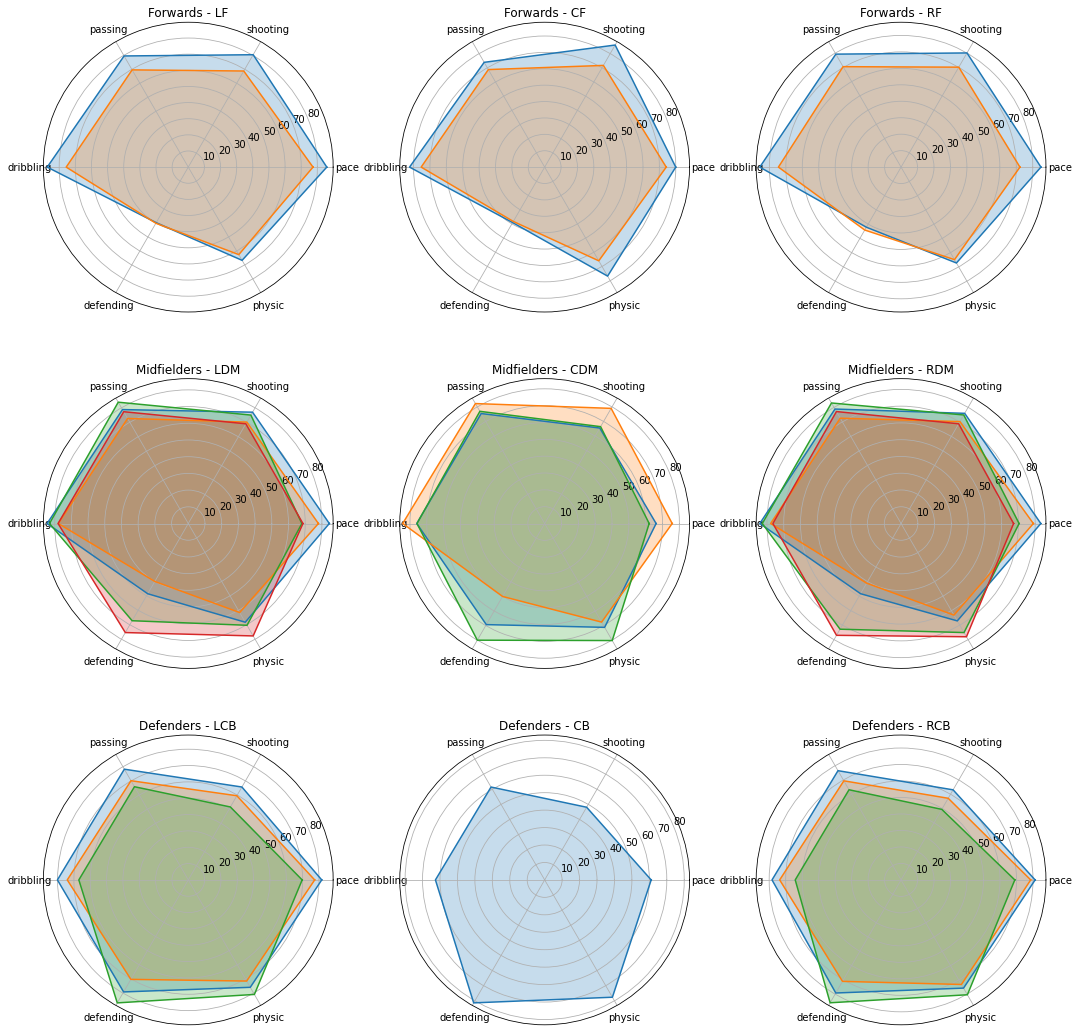

In [9]:
# 定义位置类别
positions = {
    'Forwards': ['ST', 'CF', 'LW', 'RW', 'LF', 'RF'],
    'Midfielders': ['CM', 'CAM', 'CDM', 'LM', 'RM', 'LAM', 'RAM', 'LCM', 'RCM', 'LDM', 'RDM'],
    'Defenders': ['CB', 'LB', 'RB', 'LWB', 'RWB', 'LCB', 'RCB']
}

# 感兴趣的属性列表
attributes = ['pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic']

# 创建一个大图来展示所有雷达图
fig, axs = plt.subplots(3, 3, figsize=(15, 15), subplot_kw=dict(polar=True))

# 对每个位置类别和每个位置细分进行循环处理
for i, (position_group, position_list) in enumerate(positions.items()):
    for position in position_list:
        # 确定子图的位置
        if position.startswith('L'):
            j = 0
        elif position.startswith('R'):
            j = 2
        else:
            j = 1

        # 筛选特定位置的球员
        position_df = df[df['club_position'].isin([position])]

        # 选取前100名球员
        top_players = position_df.nlargest(100, 'overall')

        # 计算平均属性值
        avg_values = top_players[attributes].mean().tolist()

        # 绘制雷达图
        angles = np.linspace(0, 2 * np.pi, len(attributes), endpoint=False).tolist()
        avg_values += avg_values[:1]
        angles += angles[:1]
        
        axs[i, j].plot(angles, avg_values)
        axs[i, j].fill(angles, avg_values, alpha=0.25)
        axs[i, j].set_title(f'{position_group} - {position}')
        axs[i, j].set_thetagrids(np.degrees(angles[:-1]), attributes)

# 调整布局
plt.tight_layout()

# 显示图表
plt.show()

IndexError: index 3 is out of bounds for axis 0 with size 3

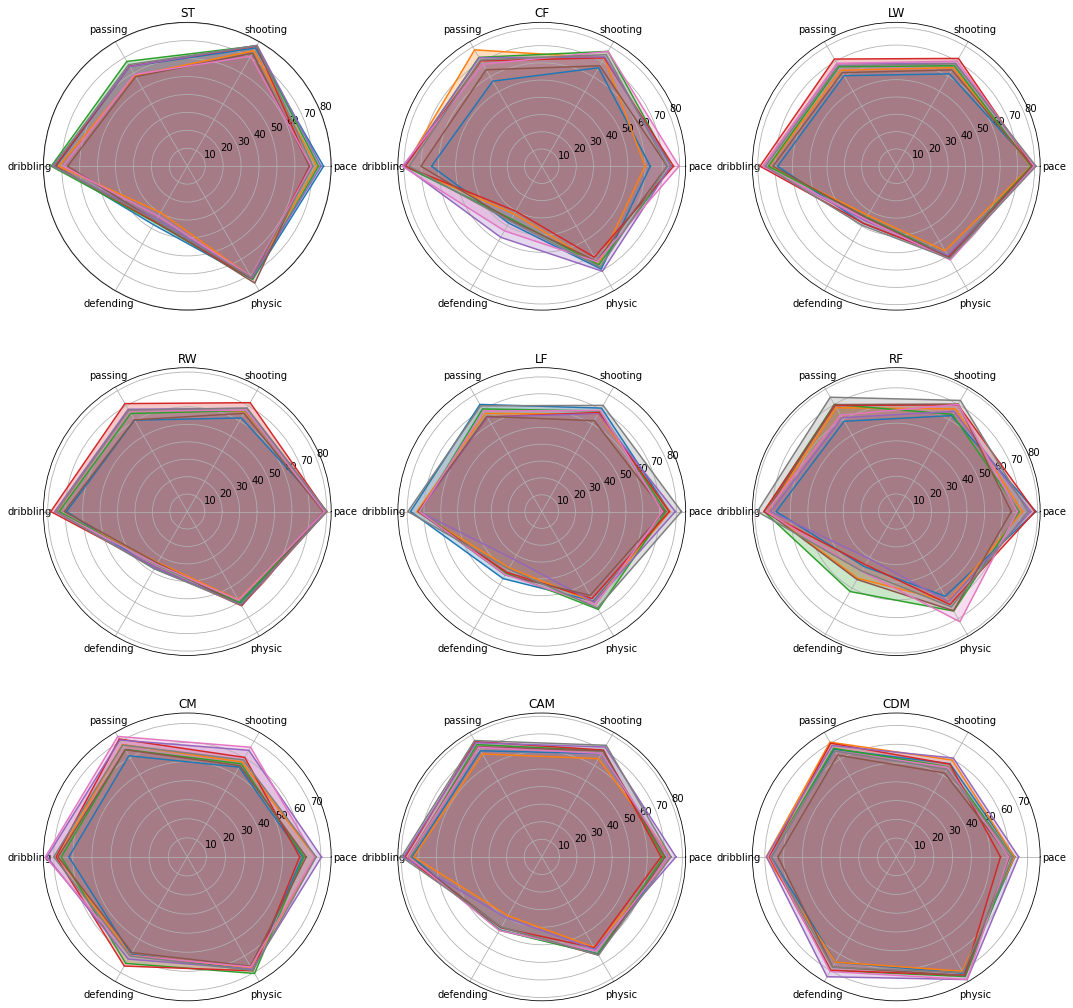

In [11]:
df = pd.read_csv('./Info_Visualize/archive/male_players.csv')

# 感兴趣的国家列表
countries = ['England', 'Italy', 'France', 'Spain', 'Brazil', 'Germany', 'Portugal', 'Argentina']
# 定义所有位置
all_positions = ['ST', 'CF', 'LW', 'RW', 'LF', 'RF', 'CM', 'CAM', 'CDM', 'LM', 'RM', 'LAM', 'RAM', 'LCM', 'RCM', 'LDM', 'RDM', 'CB', 'LB', 'RB', 'LWB', 'RWB', 'LCB', 'RCB']
# 感兴趣的属性列表
attributes = ['pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic']

# 创建一个大图来展示所有雷达图
fig, axs = plt.subplots(3, 3, figsize=(18, 18), subplot_kw=dict(polar=True))

# 对每个位置进行循环处理
for i, position in enumerate(all_positions):
    # 计算每个国家在这个位置的平均属性值
    for country in countries:
        # 筛选特定国家和位置的球员
        position_df = df[(df['nationality_name'] == country) & (df['club_position'] == position)]

        # 选取前100名球员
        top_players = position_df.nlargest(100, 'overall')

        # 计算平均属性值
        avg_values = top_players[attributes].mean().tolist()

        # 绘制雷达图
        angles = np.linspace(0, 2 * np.pi, len(attributes), endpoint=False).tolist()
        avg_values += avg_values[:1]
        angles += angles[:1]

        # 确定雷达图在大图中的位置
        ax = axs[i // 3, i % 3]
        ax.plot(angles, avg_values, label=country)
        ax.fill(angles, avg_values, alpha=0.25)

    # 设置雷达图的属性
    ax.set_thetagrids(np.degrees(angles[:-1]), attributes)
    ax.set_title(position)

# 添加图例
plt.legend(loc='upper right', bbox_to_anchor=(1.4, 1.4))

# 调整布局
plt.tight_layout()

# 显示图表
plt.show()

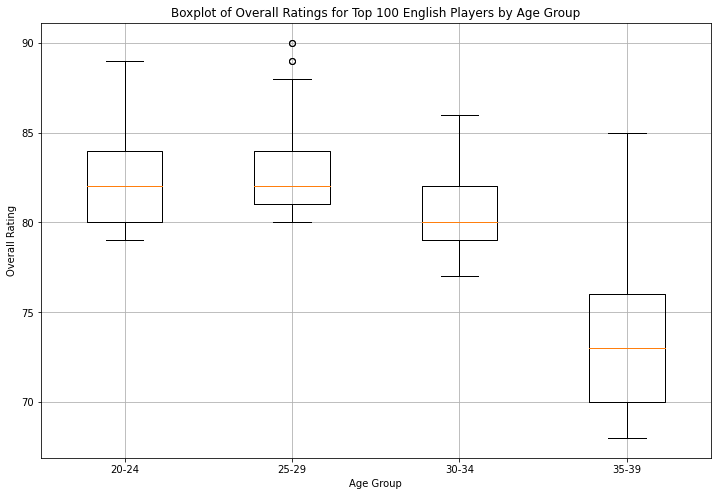

In [12]:
# 筛选英格兰球员
england_players = df[df['nationality_name'] == 'England']

# 定义不同的年龄分段
age_bins = [20, 25, 30, 35, 40]

# 创建箱型图数据的空列表
boxplot_data = []
age_labels = []

# 为每个年龄段获取数据
for i in range(len(age_bins) - 1):
    # 筛选出该年龄段的球员
    age_group_players = england_players[
        (england_players['age'] >= age_bins[i]) & (england_players['age'] < age_bins[i+1])
    ]
    
    # 如果该年龄段的球员少于100人，则选择所有球员
    # 否则选择整体评分排名前100的球员
    if len(age_group_players) > 100:
        top_players = age_group_players.nlargest(100, 'overall')
    else:
        top_players = age_group_players
    
    # 添加该年龄组的整体评分到数据列表中
    boxplot_data.append(top_players['overall'])
    age_labels.append(f"{age_bins[i]}-{age_bins[i+1]-1}")

# 设置箱型图
plt.figure(figsize=(12, 8))
plt.boxplot(boxplot_data, labels=age_labels)
plt.title('Boxplot of Overall Ratings for Top 100 English Players by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Overall Rating')
plt.grid(True)
plt.show()


In [15]:
# 筛选英格兰球员
england_players = df[df['nationality_name'] == 'England']

# 获取英格兰球员的年龄范围
min_age = england_players['age'].min()
max_age = england_players['age'].max()

# 创建箱型图数据的空列表
boxplot_data = []
age_labels = []

# 为每一岁的年龄获取数据
for age in range(min_age, max_age + 1):
    # 筛选出该年龄的球员
    age_players = england_players[england_players['age'] == age]
    
    # 选择整体评分排名前100的球员，如果不足100人，则选择所有球员
    top_players = age_players.nlargest(min(100, len(age_players)), 'overall')
    
    # 如果该年龄有球员，则添加到箱型图数据列表中
    if not top_players.empty:
        boxplot_data.append(top_players['overall'])
        age_labels.append(str(age))
# 设置箱型图颜色为蓝色
for patch in boxplot_data['boxes']:
    patch.set_facecolor('blue')
# 绘制箱型图
plt.figure(figsize=(20, 10))  # 根据年龄的数量，可能需要调整图的大小
plt.boxplot(boxplot_data, labels=age_labels)
plt.title('Boxplot of Overall Ratings for Top 100 English Players by Age')
plt.xlabel('Age')
plt.ylabel('Overall Rating')
plt.xticks(rotation=90)  # 旋转x轴标签以便阅读
plt.tight_layout()  # 调整布局以防止标签重叠
plt.show()

TypeError: list indices must be integers or slices, not str

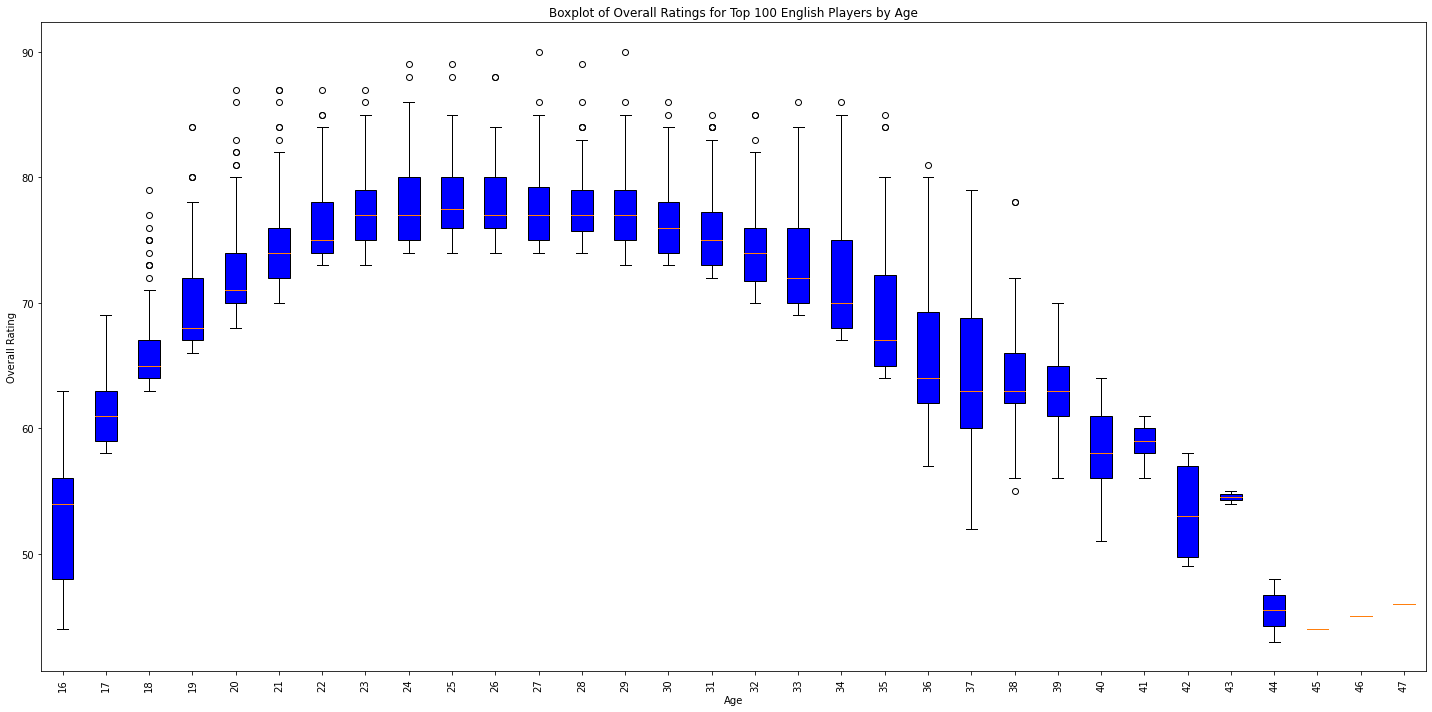

In [17]:
# 筛选英格兰球员
england_players = df[df['nationality_name'] == 'England']

# 获取英格兰球员的年龄范围
min_age = england_players['age'].min()
max_age = england_players['age'].max()

# 创建箱型图数据的空列表
boxplot_data = []
age_labels = []

# 为每一岁的年龄获取数据
for age in range(min_age, max_age + 1):
    # 筛选出该年龄的球员
    age_players = england_players[england_players['age'] == age]
    
    # 选择整体评分排名前100的球员，如果不足100人，则选择所有球员
    top_players = age_players.nlargest(min(100, len(age_players)), 'overall')
    
    # 如果该年龄有球员，则添加到箱型图数据列表中
    if not top_players.empty:
        boxplot_data.append(top_players['overall'])
        age_labels.append(str(age))

# 绘制箱型图
plt.figure(figsize=(20, 10))  # 根据年龄的数量，可能需要调整图的大小
boxplots = plt.boxplot(boxplot_data, labels=age_labels, patch_artist=True)

# 设置箱型图颜色为蓝色
for box in boxplots['boxes']:
    box.set_facecolor('b')

plt.title('Boxplot of Overall Ratings for Top 100 English Players by Age')
plt.xlabel('Age')
plt.ylabel('Overall Rating')
plt.xticks(rotation=90)  # 旋转x轴标签以便阅读
plt.tight_layout()  # 调整布局以防止标签重叠
plt.show()

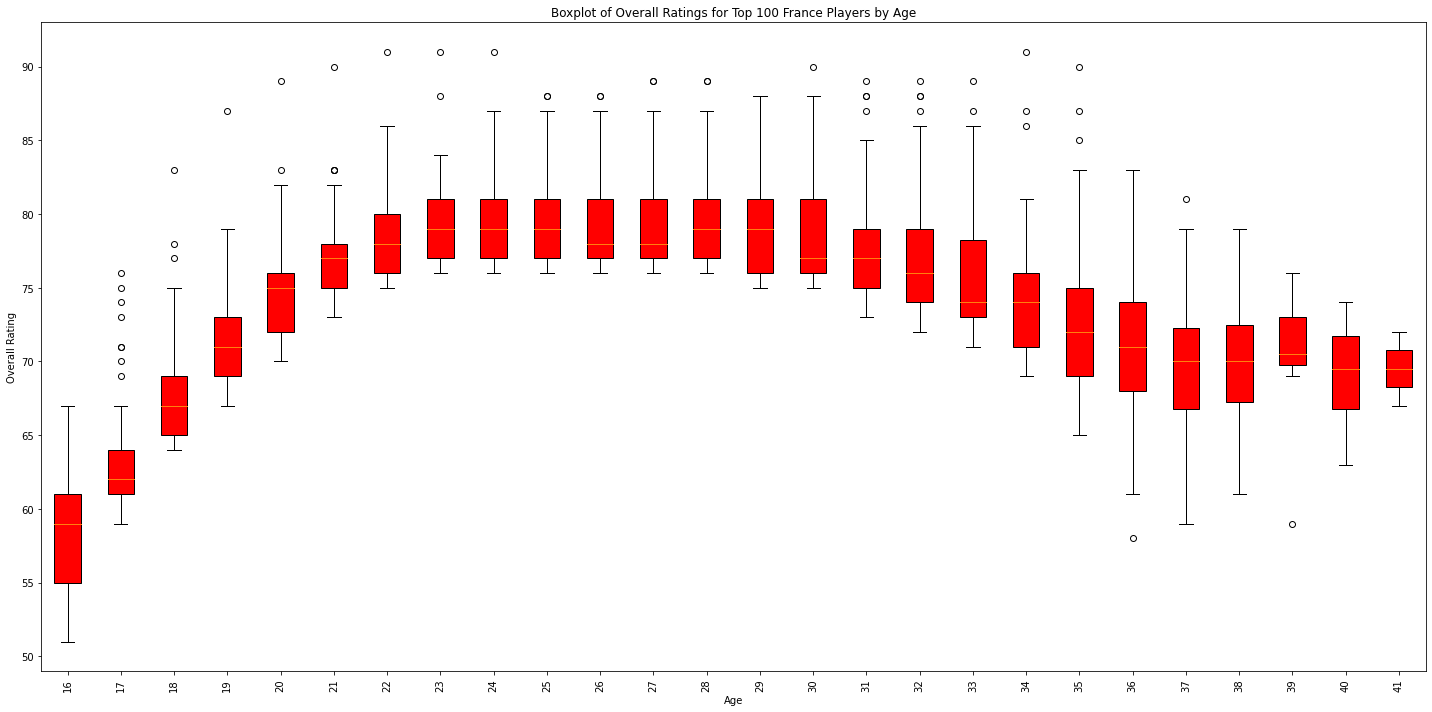

In [21]:
# 筛选英格兰球员
england_players = df[df['nationality_name'] == 'France']

# 获取英格兰球员的年龄范围
min_age = england_players['age'].min()
max_age = england_players['age'].max()

# 创建箱型图数据的空列表
boxplot_data = []
age_labels = []

# 为每一岁的年龄获取数据
for age in range(min_age, max_age + 1):
    # 筛选出该年龄的球员
    age_players = england_players[england_players['age'] == age]
    
    # 选择整体评分排名前100的球员，如果不足100人，则选择所有球员
    top_players = age_players.nlargest(min(100, len(age_players)), 'overall')
    
    # 如果该年龄有球员，则添加到箱型图数据列表中
    if not top_players.empty:
        boxplot_data.append(top_players['overall'])
        age_labels.append(str(age))

# 绘制箱型图
plt.figure(figsize=(20, 10))  # 根据年龄的数量，可能需要调整图的大小
boxplots = plt.boxplot(boxplot_data, labels=age_labels, patch_artist=True)

# 设置箱型图颜色为蓝色
for box in boxplots['boxes']:
    box.set_facecolor('r')

plt.title('Boxplot of Overall Ratings for Top 100 France Players by Age')
plt.xlabel('Age')
plt.ylabel('Overall Rating')
plt.xticks(rotation=90)  # 旋转x轴标签以便阅读
plt.tight_layout()  # 调整布局以防止标签重叠
plt.show()

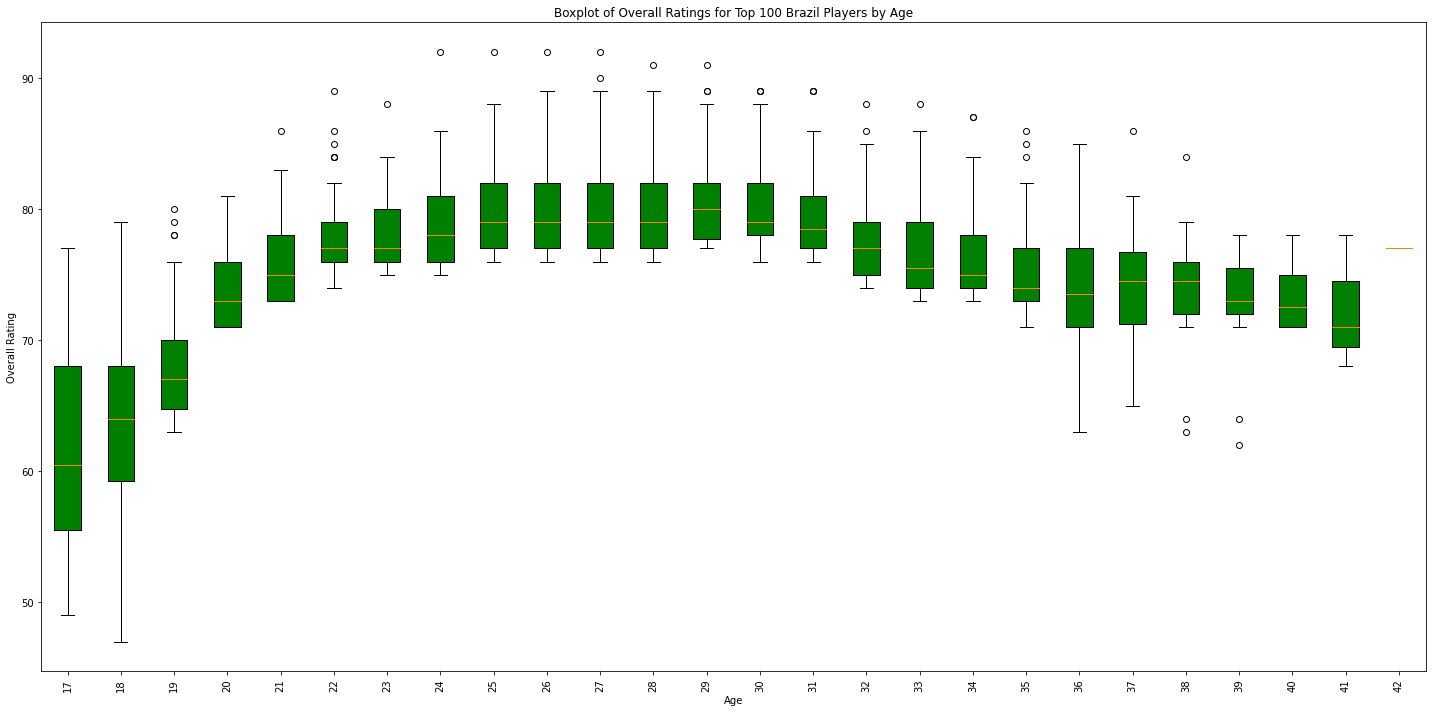

In [20]:
# 筛选英格兰球员
england_players = df[df['nationality_name'] == 'Brazil']

# 获取英格兰球员的年龄范围
min_age = england_players['age'].min()
max_age = england_players['age'].max()

# 创建箱型图数据的空列表
boxplot_data = []
age_labels = []

# 为每一岁的年龄获取数据
for age in range(min_age, max_age + 1):
    # 筛选出该年龄的球员
    age_players = england_players[england_players['age'] == age]
    
    # 选择整体评分排名前100的球员，如果不足100人，则选择所有球员
    top_players = age_players.nlargest(min(100, len(age_players)), 'overall')
    
    # 如果该年龄有球员，则添加到箱型图数据列表中
    if not top_players.empty:
        boxplot_data.append(top_players['overall'])
        age_labels.append(str(age))

# 绘制箱型图
plt.figure(figsize=(20, 10))  # 根据年龄的数量，可能需要调整图的大小
boxplots = plt.boxplot(boxplot_data, labels=age_labels, patch_artist=True)

# 设置箱型图颜色为蓝色
for box in boxplots['boxes']:
    box.set_facecolor('g')

plt.title('Boxplot of Overall Ratings for Top 100 Brazil Players by Age')
plt.xlabel('Age')
plt.ylabel('Overall Rating')
plt.xticks(rotation=90)  # 旋转x轴标签以便阅读
plt.tight_layout()  # 调整布局以防止标签重叠
plt.show()

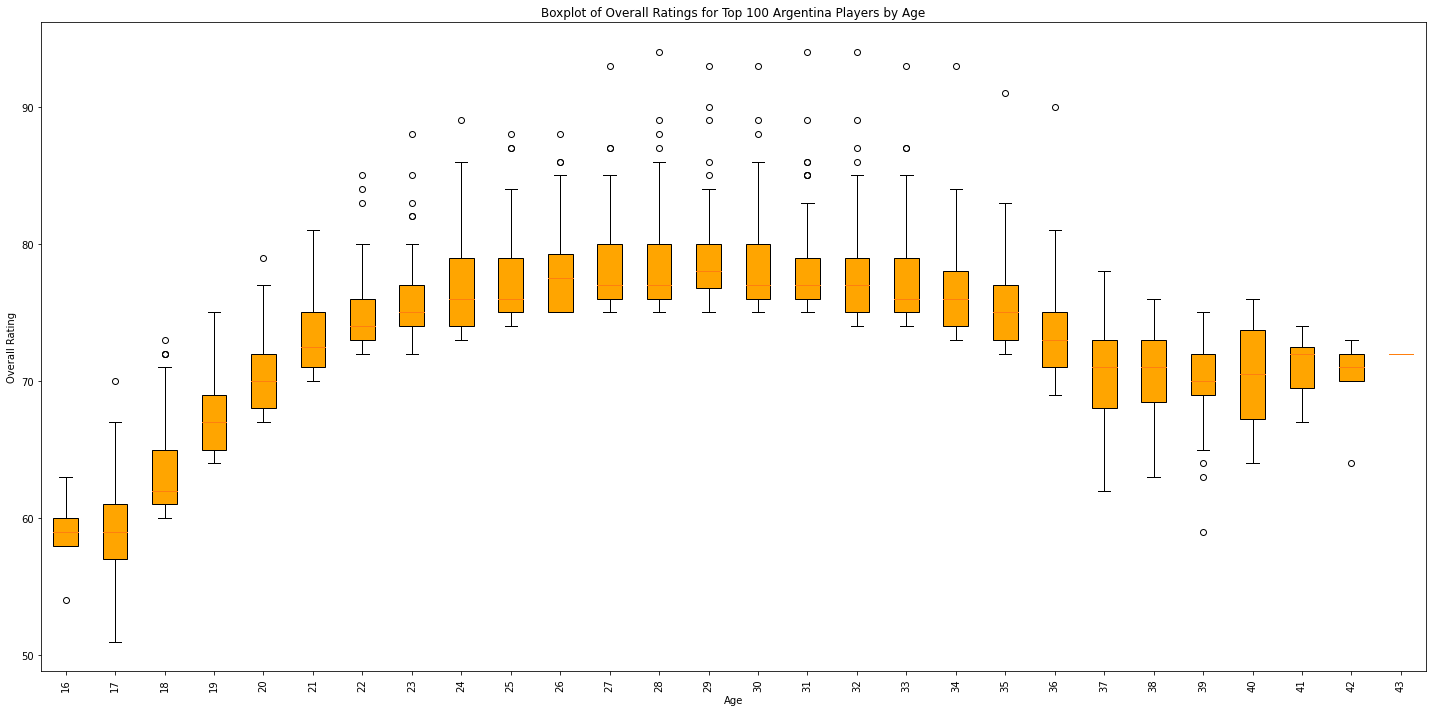

In [24]:
# 筛选英格兰球员
england_players = df[df['nationality_name'] == 'Argentina']

# 获取英格兰球员的年龄范围
min_age = england_players['age'].min()
max_age = england_players['age'].max()

# 创建箱型图数据的空列表
boxplot_data = []
age_labels = []

# 为每一岁的年龄获取数据
for age in range(min_age, max_age + 1):
    # 筛选出该年龄的球员
    age_players = england_players[england_players['age'] == age]
    
    # 选择整体评分排名前100的球员，如果不足100人，则选择所有球员
    top_players = age_players.nlargest(min(100, len(age_players)), 'overall')
    
    # 如果该年龄有球员，则添加到箱型图数据列表中
    if not top_players.empty:
        boxplot_data.append(top_players['overall'])
        age_labels.append(str(age))

# 绘制箱型图
plt.figure(figsize=(20, 10))  # 根据年龄的数量，可能需要调整图的大小
boxplots = plt.boxplot(boxplot_data, labels=age_labels, patch_artist=True)

# 设置箱型图颜色为蓝色
for box in boxplots['boxes']:
    box.set_facecolor('orange')

plt.title('Boxplot of Overall Ratings for Top 100 Argentina Players by Age')
plt.xlabel('Age')
plt.ylabel('Overall Rating')
plt.xticks(rotation=90)  # 旋转x轴标签以便阅读
plt.tight_layout()  # 调整布局以防止标签重叠
plt.show()

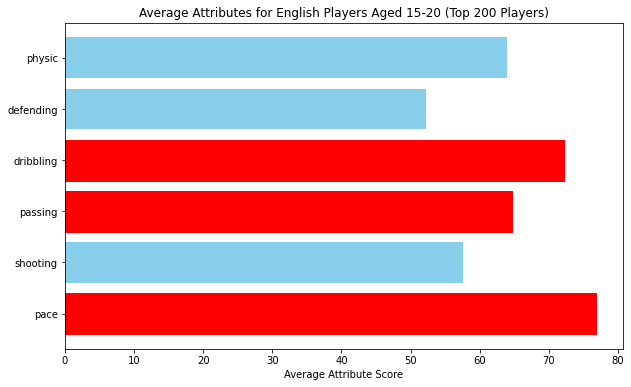

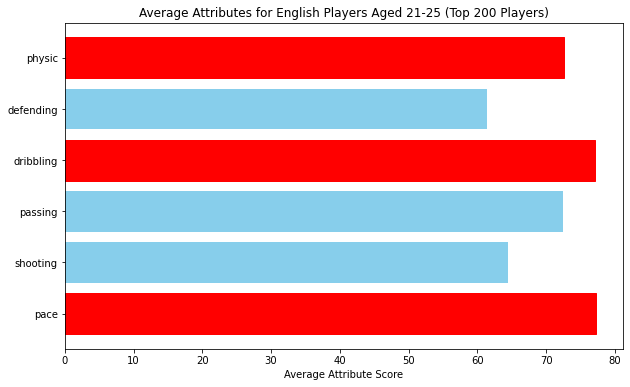

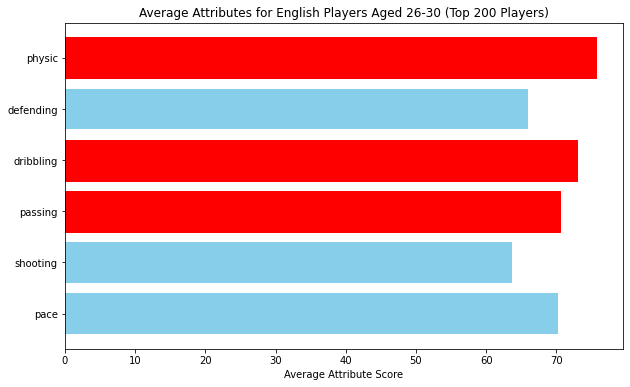

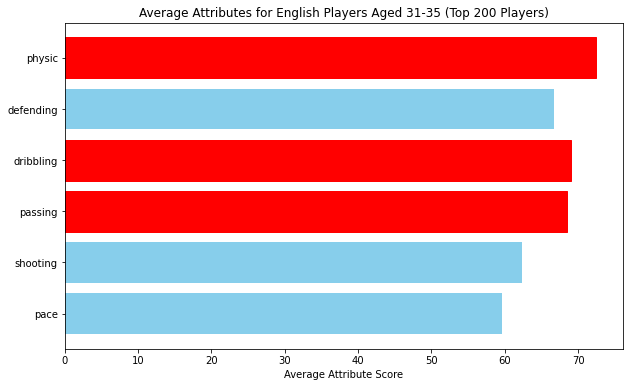

In [47]:
# 筛选英格兰球员
england_players = df[df['nationality_name'] == 'England']

# 定义年龄段
age_groups = {
    '15-20': (15, 20),
    '21-25': (21, 25),
    '26-30': (26, 30),
    '31-35': (31, 35)
}

# 感兴趣的属性列表
attributes = ['pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic']

# 遍历每个年龄段
for age_group, (age_min, age_max) in age_groups.items():
    # 筛选特定年龄段的球员
    players_in_age_group = england_players[
        (england_players['age'] >= age_min) & (england_players['age'] <= age_max)
    ]

    # 选择排名前200的球员
    top_players = players_in_age_group.nlargest(200, 'overall')

    # 计算每个属性的平均值
    avg_attributes = top_players[attributes].mean()

    # 找出平均值最高的三个属性
    top_attributes = avg_attributes.nlargest(3).index

    # 绘制水平柱状图
    plt.figure(figsize=(10, 6))
    bars = plt.barh(avg_attributes.index, avg_attributes.values, color='skyblue')
    
    # Get the y-tick labels which correspond to the attribute names
    ytick_labels = [tick.get_text() for tick in plt.gca().get_yticklabels()]

    # Set the color of the top 3 attributes to red
    for bar, attr in zip(bars, avg_attributes.index):
        if attr in top_attributes:
            bar.set_color('red')

    plt.title(f'Average Attributes for English Players Aged {age_group} (Top 200 Players)')
    plt.xlabel('Average Attribute Score')
    plt.show()

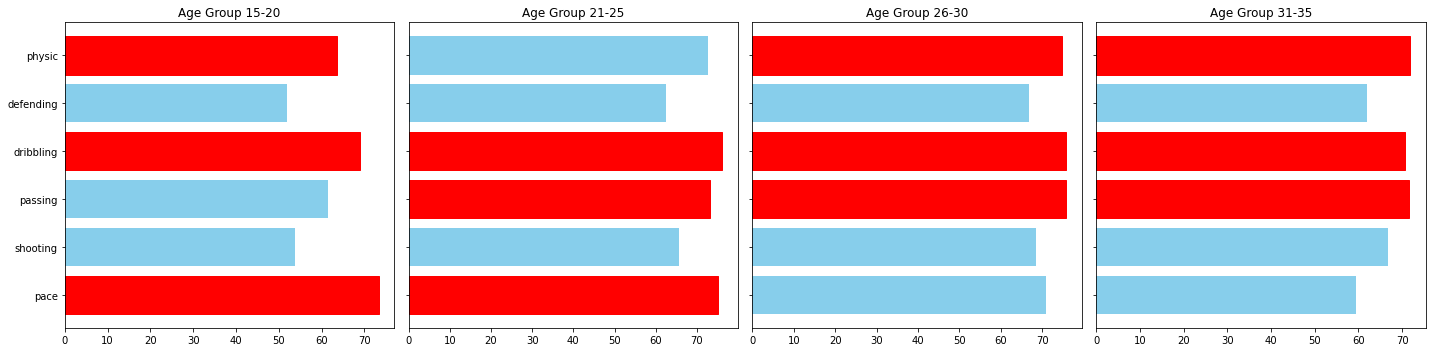

In [53]:
# Filter for English players
england_players = df[df['nationality_name'] == 'Germany']

# Define age groups and create a figure with subplots
age_groups = [(15, 20), (21, 25), (26, 30), (31, 35)]
fig, axs = plt.subplots(1, len(age_groups), figsize=(20, 5), sharey=True)

# Attributes of interest
attributes = ['pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic']

# Generate a horizontal bar chart for each age group
for ax, age_group in zip(axs, age_groups):
    # Filter players in the age group and take the top 200 based on 'overall'
    players_in_group = england_players[(england_players['age'] >= age_group[0]) & 
                                       (england_players['age'] <= age_group[1])]
    top_players = players_in_group.nlargest(200, 'overall')
    
    # Calculate the mean of the attributes
    mean_values = top_players[attributes].mean()
    
    # Get the top 3 attributes
    top_attributes = mean_values.nlargest(3)
    
    # Create the bar chart
    bars = ax.barh(attributes, mean_values, color='skyblue')
    
    # Color the top 3 bars in red
    for bar, attr in zip(bars, attributes):
        if attr in top_attributes.index:
            bar.set_color('red')
    
    # Set the title for each subplot
    ax.set_title(f'Age Group {age_group[0]}-{age_group[1]}')

# Show the plot
plt.tight_layout()
plt.show()

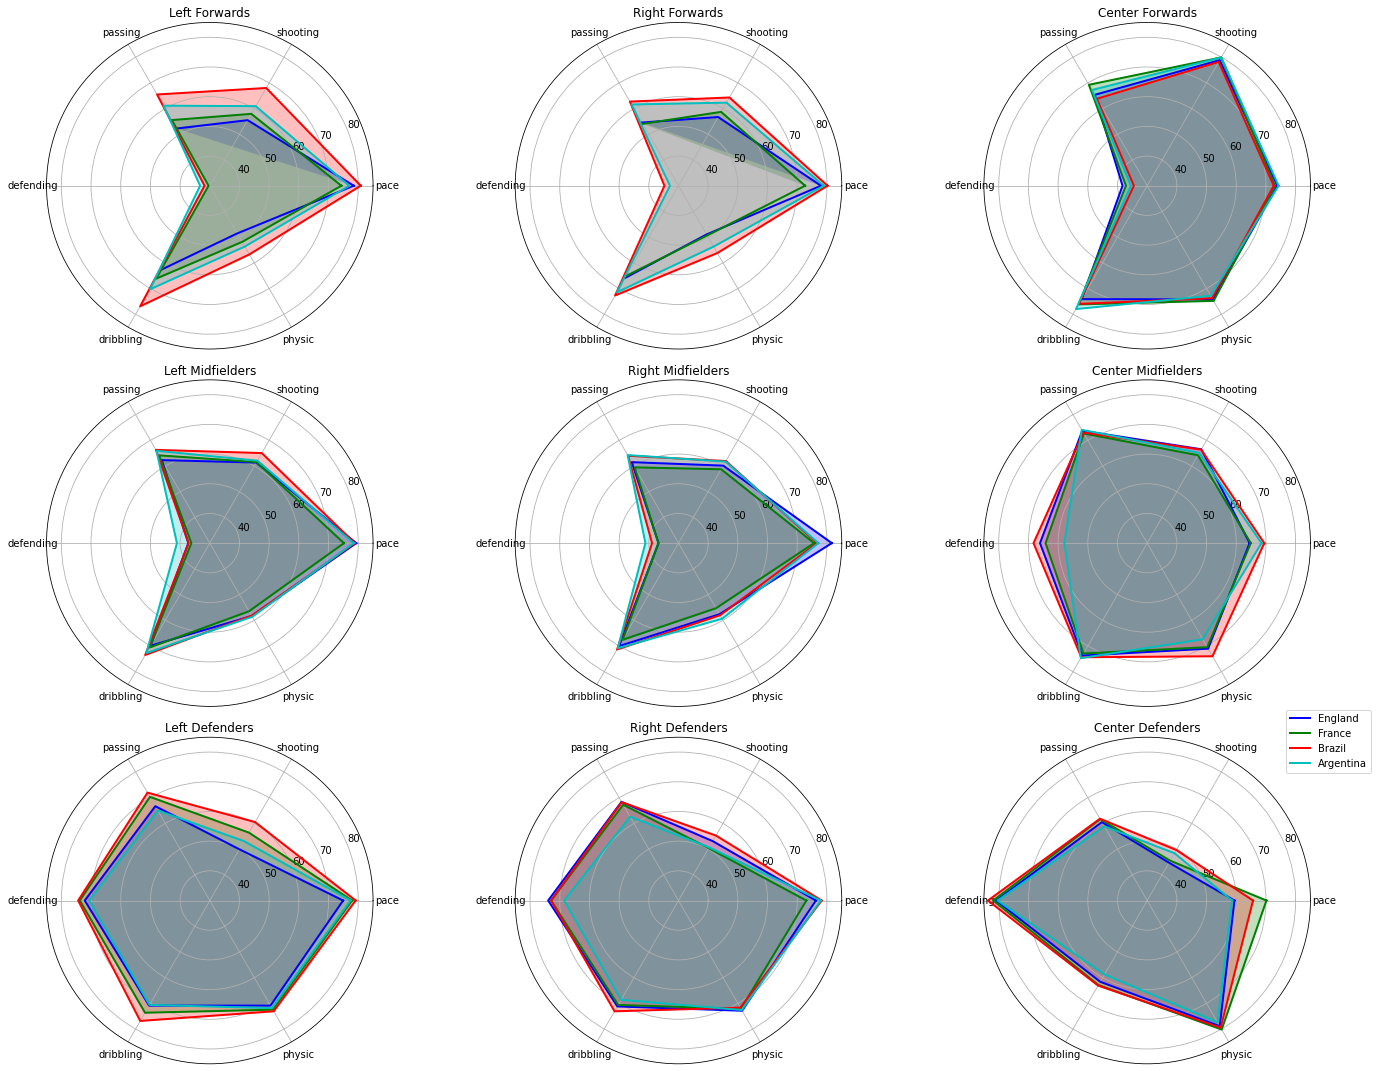

In [58]:
# 新的位置分类
positions_categories = {
    'Left Forwards': ['LW', 'LF'],
    'Right Forwards': ['RW', 'RF'],
    'Center Forwards': ['ST', 'CF'],
    'Left Midfielders': ['LM', 'LAM', 'LCM', 'LDM'],
    'Right Midfielders': ['RM', 'RAM', 'RCM', 'RDM'],
    'Center Midfielders': ['CM', 'CAM', 'CDM'],
    'Left Defenders': ['LB', 'LWB'],
    'Right Defenders': ['RB', 'RWB'],
    'Center Defenders': ['CB', 'LCB', 'RCB']
}
colors = ['b', 'g', 'r', 'c']
countries = ['England', 'France', 'Brazil', 'Argentina']
attributes = ['pace', 'shooting', 'passing', 'defending', 'dribbling', 'physic']

# 创建大图布局
fig, axes = plt.subplots(3, 3, figsize=(20, 15), subplot_kw=dict(polar=True))
axes = axes.flatten()  # 将多维数组转换为一维数组，以便轻松迭代

for ax, (pos_group, pos_list) in zip(axes, positions_categories.items()):
    for country, color in zip(countries, colors):
        # 获取国家的前100名球员
        top_100 = df[(df['nationality_name'] == country) & (df['player_positions'].isin(pos_list))].nlargest(100, 'overall')
        
        # 计算平均值
        means = top_100[attributes].mean().tolist()
        
        # 为了闭合雷达图
        means += means[:1]
        
        # 雷达图的角度设置
        angles = [n / float(len(attributes)) * 2 * np.pi for n in range(len(attributes))]
        angles += angles[:1]
        
        ax.plot(angles, means, color=color, linewidth=2, label=country)
        ax.fill(angles, means, color=color, alpha=0.25)
        ax.set_ylim(30, 85)
        ax.set_xticks(angles[:-1])
        ax.set_xticklabels(attributes)
        ax.set_title(pos_group)

# 调整图例和布局
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1.1))
plt.tight_layout()
plt.show()

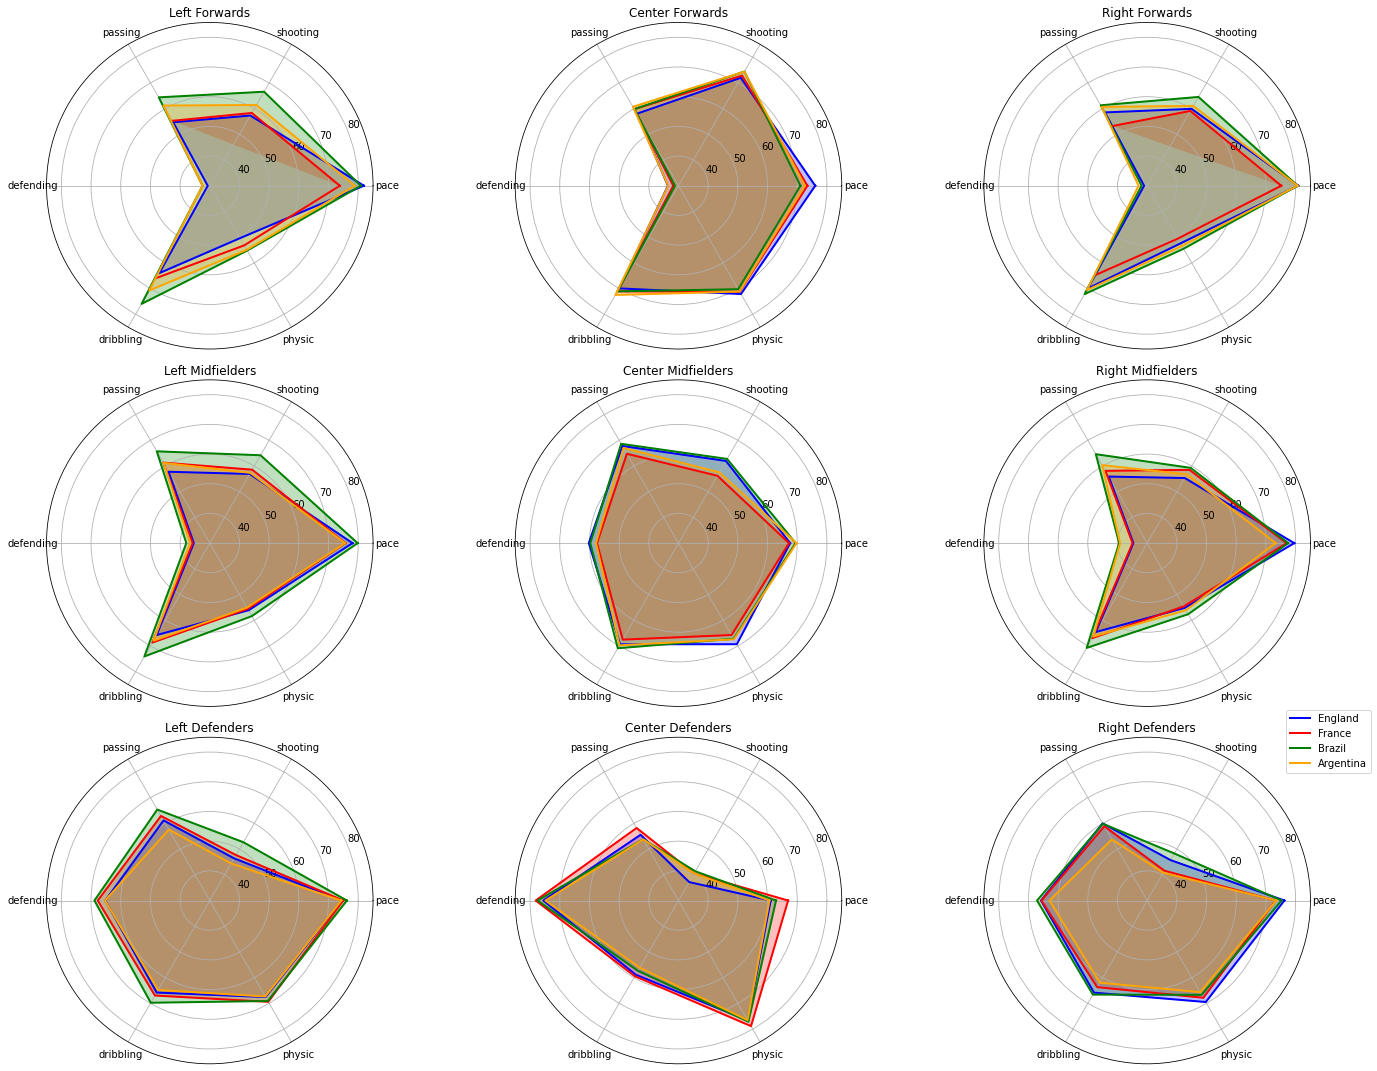

In [80]:
# 筛选年龄在22至28岁之间的球员
df_age_filtered = df[(df['age'] >= 20) & (df['age'] <= 28)]

# 新的位置分类
positions_categories = {
    'Left Forwards': ['LW', 'LF'],
    'Center Forwards': ['ST', 'CF'],
        'Right Forwards': ['RW', 'RF'],
    'Left Midfielders': ['LM', 'LAM', 'LCM', 'LDM'],
    'Center Midfielders': ['CM', 'CAM', 'CDM'],
        'Right Midfielders': ['RM', 'RAM', 'RCM', 'RDM'],
    'Left Defenders': ['LB', 'LWB'],
    'Center Defenders': ['CB', 'LCB', 'RCB'],
        'Right Defenders': ['RB', 'RWB']
}
colors = ['b', 'r', 'g', 'orange']
countries = ['England', 'France', 'Brazil', 'Argentina']
attributes = ['pace', 'shooting', 'passing', 'defending', 'dribbling', 'physic']

# 创建大图布局
fig, axes = plt.subplots(3, 3, figsize=(20, 15), subplot_kw=dict(polar=True))
axes = axes.flatten()  # 将多维数组转换为一维数组，以便轻松迭代

for ax, (pos_group, pos_list) in zip(axes, positions_categories.items()):
    for country, color in zip(countries, colors):
        # 获取特定年龄段和国家的前100名球员
        top_100 = df_age_filtered[(df_age_filtered['nationality_name'] == country) & 
                                  (df_age_filtered['player_positions'].isin(pos_list))].nlargest(200, 'overall')
        
        # 计算平均值
        means = top_100[attributes].mean().tolist()
        
        # 为了闭合雷达图
        means += means[:1]
        
        # 雷达图的角度设置
        angles = [n / float(len(attributes)) * 2 * np.pi for n in range(len(attributes))]
        angles += angles[:1]
        
        ax.plot(angles, means, color=color, linewidth=2, label=country)
        ax.fill(angles, means, color=color, alpha=0.25)
        ax.set_ylim(30, 85)
        ax.set_xticks(angles[:-1])
        ax.set_xticklabels(attributes)
        ax.set_title(pos_group)

# 调整图例和布局
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1.1))
plt.tight_layout()
plt.show()

/Users/chenyida/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 45.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/chenyida/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 17.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/chenyida/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 39.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/chenyida/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 20.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/chenyida/opt/anaconda3/lib/python3.8/

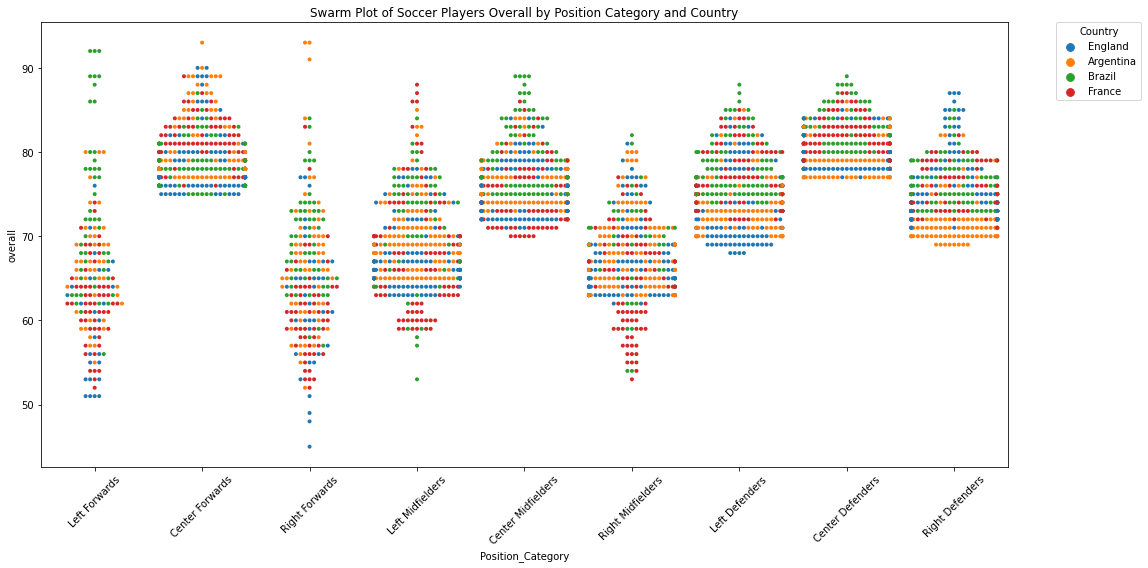

In [81]:
import seaborn as sns

positions_categories = {
    'Left Forwards': ['LW', 'LF'],
    'Center Forwards': ['ST', 'CF'],
    'Right Forwards': ['RW', 'RF'],
    'Left Midfielders': ['LM', 'LAM', 'LCM', 'LDM'],
    'Center Midfielders': ['CM', 'CAM', 'CDM'],
    'Right Midfielders': ['RM', 'RAM', 'RCM', 'RDM'],
    'Left Defenders': ['LB', 'LWB'],
    'Center Defenders': ['CB', 'LCB', 'RCB'],
    'Right Defenders': ['RB', 'RWB']
}

# 四个国家
countries = ['England', 'Argentina','Brazil', 'France',]

# 为了创建群组图，我们需要按位置分类和国家分组，然后取每组的前100名球员
top_players_by_position = pd.DataFrame()

for pos_group, positions in positions_categories.items():
    for country in countries:
        top_players = df[
            (df['nationality_name'] == country) & 
            (df['player_positions'].isin(positions))
        ].nlargest(100, 'overall')
        top_players['Position_Category'] = pos_group  # 添加位置分类信息
        top_players_by_position = top_players_by_position.append(top_players)

# 创建群组图
plt.figure(figsize=(16, 8))  # 增加图表尺寸
sns.swarmplot(x="Position_Category", y="overall", data=top_players_by_position,
              hue="nationality_name", size=4)  # 减小标记大小

# 绘图美化
plt.title('Swarm Plot of Soccer Players Overall by Position Category and Country')
plt.xticks(rotation=45)
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.tight_layout()
plt.show()